In [21]:
df_16 = pd.read_csv('/Users/federicogamberini/VS Code/Iphone_price/iphone16.csv', index_col=0)

In [18]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import schedule
import time
from datetime import datetime

# URL del prodotto
URL = "https://www.amazon.it/dp/B0DGJJXBM5?th=1"

# Headers per simulare browser
HEADERS = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) "
    "AppleWebKit/537.36 (KHTML, like Gecko) "
    "Chrome/113.0.0.0 Safari/537.36"
}

def estrai_prezzo():
    global df_16 #Serve solo se df_16 è definito fuori dalla funzione estrai_prezzo(), altrimenti Python la considererebbe una variabile locale.
    try:
        response = requests.get(URL, headers=HEADERS)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, "html.parser")

        # Trovo il tag del prezzo
        span_price = soup.find("span", class_="a-price aok-align-center reinventPricePriceToPayMargin priceToPay")
        if not span_price:
            print("Prezzo non trovato nella pagina")
            return
        
        # Estraggo il testo del prezzo
        whole = span_price.find("span", class_="a-price-whole").text.strip()
        fraction = span_price.find("span", class_="a-price-fraction").text.strip()

        # Rimuovo separatori di migliaia (es. '1.149' -> '1149')
        whole_clean = whole.replace(".", "").replace(",", "").strip()
        prezzo_str = f"{whole_clean}.{fraction}"  # Unisco con punto decimale: Esempio: "1149.00"
        prezzo_float = float(prezzo_str) # Conversione in float

        # Aggiungo la nuova riga con data odierna
        oggi = datetime.now().strftime("%d-%m-%Y")
        new_row = {"Data": oggi, "Prezzo": prezzo_float}
        df_16 = pd.concat([df_16, pd.DataFrame([new_row])], ignore_index=True)
        print(f"Prezzo {prezzo_float} aggiunto per la data {oggi}")

    except Exception as e:
        print("Errore durante lo scraping:", e)

estrai_prezzo()

Prezzo 769.0 aggiunto per la data 23-06-2025


In [20]:
df_16.to_csv("iphone16.csv", index=False)

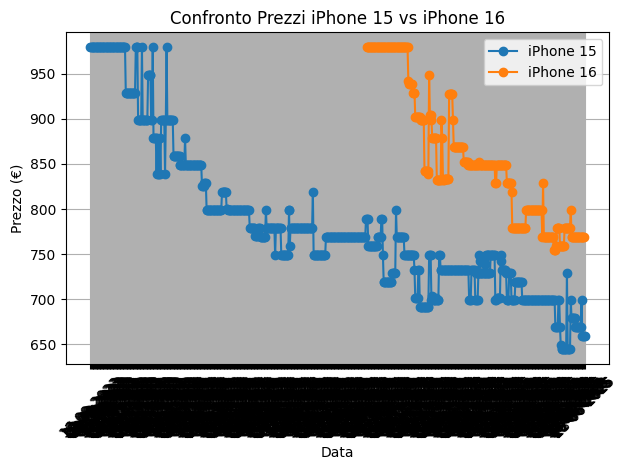

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

d1 = pd.read_csv("iphone15.csv")
d2 = pd.read_csv("iphone16.csv")

plot = plt.figure()
plt.plot(d1['Data'], d1['Prezzo'], label='iPhone 15', marker='o')
plt.plot(d2['Data'], d2['Prezzo'], label='iPhone 16', marker='o')
plt.xlabel('Data')
plt.ylabel('Prezzo (€)')
plt.title('Confronto Prezzi iPhone 15 vs iPhone 16')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid()